In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import matplotlib.ticker as tick

%matplotlib inline

In [10]:
glob.glob('*')

['201802-fordgobike-tripdata.csv',
 '201811-fordgobike-tripdata.csv',
 '201809-fordgobike-tripdata.csv',
 '201806-fordgobike-tripdata.csv',
 '201805-fordgobike-tripdata.csv',
 '201812-fordgobike-tripdata.csv',
 '201801-fordgobike-tripdata.csv',
 '201807-fordgobike-tripdata.csv',
 '201808-fordgobike-tripdata.csv',
 '201810-fordgobike-tripdata.csv',
 'Gobike_system.ipynb',
 '201803-fordgobike-tripdata.csv',
 '201804-fordgobike-tripdata.csv']

In [2]:
files = ['\201801-fordgobike-tripdata.csv',
              '\201802-fordgobike-tripdata.csv',
              '\201803-fordgobike-tripdata.csv',
              '\201804-fordgobike-tripdata.csv',
              '\201805-fordgobike-tripdata.csv',
              '\201806-fordgobike-tripdata.csv',
              '\201807-fordgobike-tripdata.csv',
              '\201808-fordgobike-tripdata.csv',
              '\201809-fordgobike-tripdata.csv',
              '\201810-fordgobike-tripdata.csv',
              '\201811-fordgobike-tripdata.csv',
               '\201812-fordgobike-tripdata.csv']

In [11]:
bike_data = pd.concat([pd.read_csv(f,) for f in glob.glob( "*.csv")],ignore_index=True)

In [12]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes


In [14]:
bike_data.shape

(1863721, 14)

# Dataset Copy

In [17]:
df_bike=bike_data.copy()

In [18]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [19]:
df_bike.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.40257,1035,Subscriber,No


In [20]:
df_bike.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df_bike.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,Yerba Buena Center for the Arts (Howard St at ...,Rhode Island St at 17th St,1035,Subscriber,No


In [21]:
df_bike.bike_id.nunique()

5054

# Dataset structure

There are 5054 bikes in this dataset with 1,863,721 rows and 8 features (duration_sec, start_time, end_time, start_ station_name, end_station_name, bike_id, user_type, bike_share_for_all_trip.) Most variables are numeric apart from the user_type and location names which are objects.

# Univariate Exploration

## Trip counts v.s. Seconds

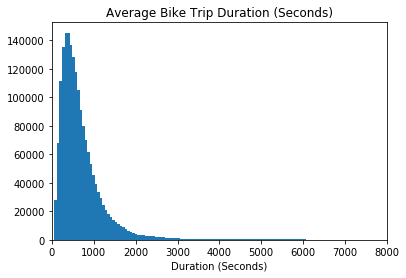

In [22]:
bin_edges = np.arange(0, df_copy['duration_sec'].max() + 100 , 60)
plt.hist(data = df_copy , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,8000)
plt.title('Average Bike Trip Duration (Seconds)')
plt.xlabel('Duration (Seconds)');

We can tell from above plot that maximum 140000 bike trip held for an average 700 seconds.

## Trips counts v.s. Minutes

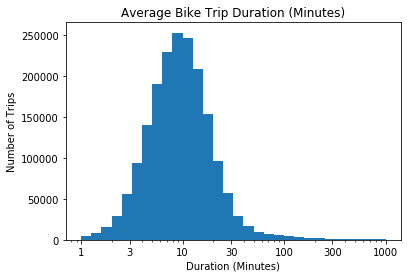

In [23]:
df_bike['duration_min'] = df_bike['duration_sec'] / 60
# Log transform 
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_bike, x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('Average Bike Trip Duration (Minutes)');
plt.ylabel('Number of Trips');

The average bike lasts between 1 and just over 100 minutes with the majority of bike trips lasting just under 10 minutes.

## Subscriber v.s. Customer counts

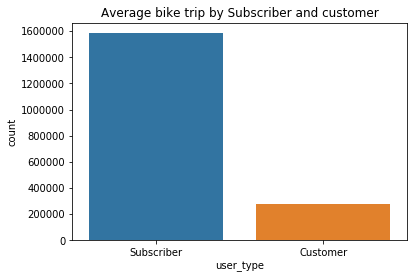

In [26]:
sb.countplot(data=df_bike,x='user_type')
plt.title('Average bike trip by Subscriber and customer');

Apparently, there are nearly 7 times more Subscriber than Customer.

# Bivariate Exploration

In [27]:
df_bike['month'] = pd.DatetimeIndex(df_bike['start_time']).month
df_bike.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,bike_share_for_all_trip,duration_min,month
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,Yerba Buena Center for the Arts (Howard St at ...,Rhode Island St at 17th St,1035,Subscriber,No,9.966667,2


In [28]:
df_bike.month.value_counts()

10    201458
7     199222
6     195968
8     192162
9     186217
5     179125
11    134135
12    131363
4     131169
3     111382
2     106718
1      94802
Name: month, dtype: int64

## Average bike ride time of months of the year

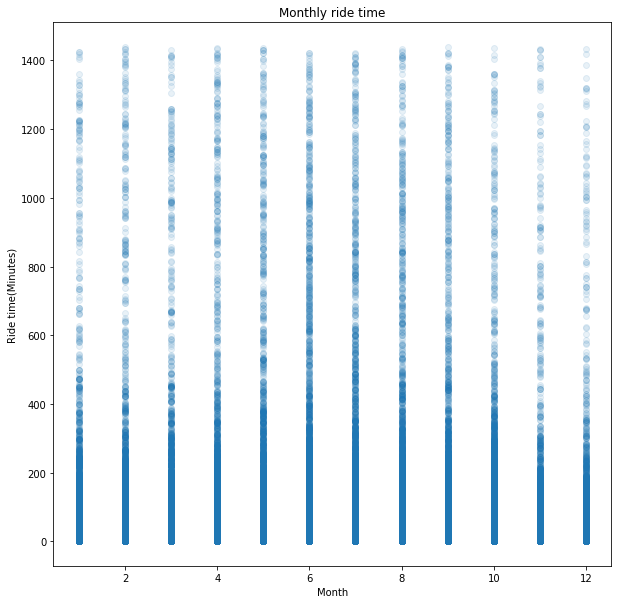

In [31]:
plt.figure(figsize = [10,10])
plt.scatter(data = df_bike , x = 'month' , y = 'duration_min' , alpha = 0.1 )
plt.title('Monthly ride time')
plt.xlabel('Month')
plt.ylabel('Ride time(Minutes)');

June and July had the longest ride time; November and December had shortest ride time.

## 10 Most common end stations

In [41]:
df_bike.end_station_name.value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    50000
San Francisco Ferry Building (Harry Bridges Plaza)           44113
San Francisco Caltrain (Townsend St at 4th St)               42970
The Embarcadero at Sansome St                                39222
Montgomery St BART Station (Market St at 2nd St)             35955
                                                             ...  
2nd St at S Park St                                             33
Lane St at Van Dyke Ave                                         33
Williams Ave at 3rd St                                          24
Viva Calle SJ                                                   15
Farnam St at Fruitvale Ave                                      12
Name: end_station_name, Length: 348, dtype: int64

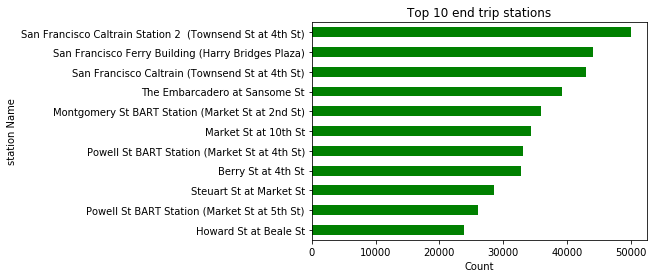

In [44]:
top_station = df_bike.end_station_name.value_counts()[:11].sort_values()
top_station.plot(kind = 'barh', color='green')
plt.title('Top 10 end trip stations')
plt.xlabel('Count')
plt.ylabel('station Name');

We can summary from above figure that most of the end stations are public transport point like train stations and BART stations

# Multivariate Exploration

Looking at the relationship between month, ride duration and user type.

In [45]:
df_bike.head(1)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,bike_share_for_all_trip,duration_min,month
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,Yerba Buena Center for the Arts (Howard St at ...,Rhode Island St at 17th St,1035,Subscriber,No,9.966667,2


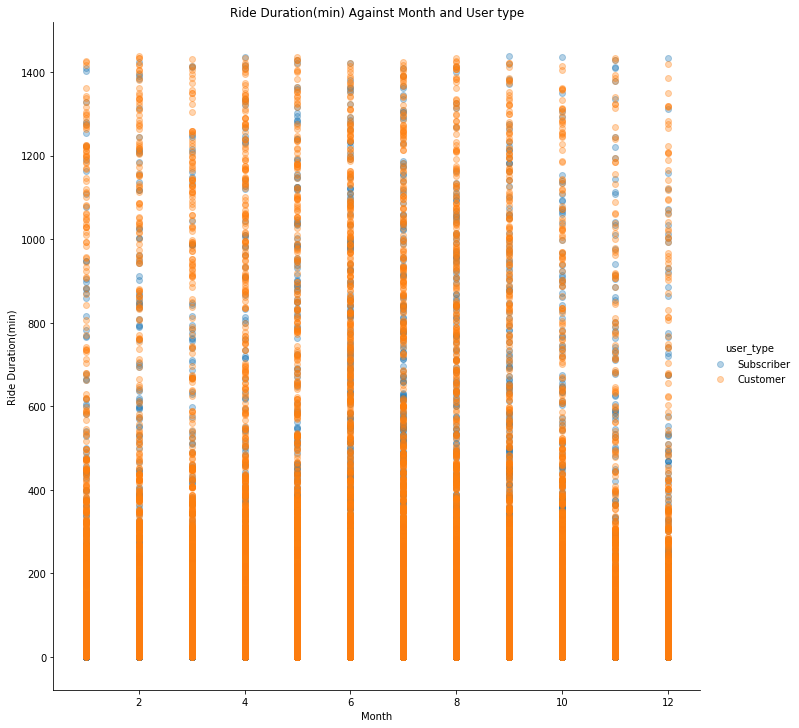

In [48]:
mul= sb.FacetGrid(data =  df_bike, hue = 'user_type', height = 10)
mul.map(plt.scatter, 'month','duration_min', alpha = 1/3)
mul.add_legend()
plt.title('Ride Duration(min) Against Month and User type')
plt.xlabel('Month')
plt.ylabel('Ride Duration(min)');

Most Customers choose short ride through the year; Subscribers prefer to have a middle and long trip through the year.